In [1]:
# Import packages
%load_ext autoreload
import sys
sys.path.append('../')

import matplotlib
matplotlib.rc_file('../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
%matplotlib inline

import numpy as np
from tqdm import tqdm_notebook as tqdm
import pickle

import darkhistory.physics as phys
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra
from H2 import *
from plotting_utils import plot_distortion

output_dir = '/Users/viviesque/OneDrive - Massachusetts Institute of Technology/DarkHistory/H2_output/'
fig_dir = '/Users/viviesque/OneDrive - Massachusetts Institute of Technology/DarkHistory/H2_figs/paper/'

# Load data for fiducial models

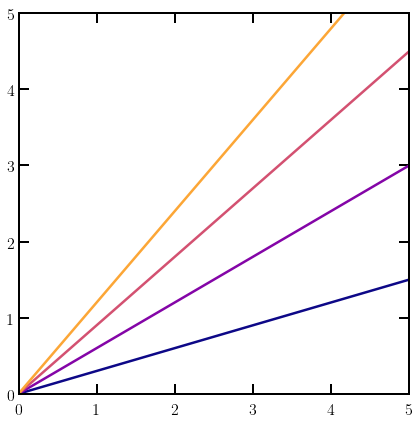

In [2]:
# Uniform color scheme for plots
cfast = cm.plasma(0.6)
cslow = cm.plasma(0)

cmap = cm.plasma(np.linspace(0.,0.8,4))

plt.figure(figsize=(7,7,))
for ii, col in enumerate(cmap):
    plt.plot(range(10), (ii+1)*0.3*np.arange(10), color=col)
plt.axis([0,5,0,5])
plt.show()

In [3]:
%autoreload
DH_data = {}
specs_list = {}
data_list = {}

# LCDM data
DH_data['LCDM'] = pickle.load(open('/Users/viviesque/Dropbox (MIT)/DarkHistory_V2/data/HL_hyrec_comparison_runs/phot_decay_log10mDM_8.0000_log10param_40.0000_no_DM_nmax_200_reprocessed_ind_0.p', 'rb'))
specs_list['LCDM'] = repack_distortions(DH_data['LCDM'])
data_list['LCDM'] = None

# Model with smaller lifetime/more energy injection. Collapse dominated by heating.
DH_data['fast'] = pickle.load(open("/Users/viviesque/Dropbox (MIT)/H2 cooling/Data/DH_data/elec_decay_log10mDM_8.2667_log10param_25.5556_nmax100_no_reion_ind_34.p", 'rb'))
#pickle.load(open("/Users/viviesque/Dropbox (MIT)/H2 cooling/Data/DH_data/elec_decay_log10mDM_8.2667_log10param_25.5556_nmax100_no_reion_ind_34.p", 'rb'))
#pickle.load(open("/Users/viviesque/Dropbox (MIT)/H2 cooling/Data/DH_data/elec_decay_log10mDM_6.7622_log10param_24.6667_nmax100_no_reion_ind_13.p", 'rb'))
specs_list['fast'] = repack_distortions(DH_data['fast'])
data_list['fast'] = repack_DH_data(DH_data['fast'])

# Model with larger lifetime/less energy injection. Collapse dominated by ionization.
DH_data['slow'] = pickle.load(open("/Users/viviesque/Dropbox (MIT)/H2 cooling/Data/DH_data/elec_decay_log10mDM_8.2667_log10param_26.4444_nmax100_no_reion_ind_35.p", 'rb'))
specs_list['slow'] = repack_distortions(DH_data['slow'])
data_list['slow'] = repack_DH_data(DH_data['slow'])

../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)
../darkhistory/spec/spectra.py:244: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(type(key), int):


In [4]:
# Redshift list, since it's usually the same for all data files
rs_list = DH_data['LCDM']['data'][-1]['rs']
dlnz = np.log(rs_list[0])-np.log(rs_list[1])

# H2 abundance/formation rate in the IGM, with and without energy injection

In [5]:
### Digitized plots for comparison

# H2 formation rate from Fig. 5 of https://iopscience.iop.org/article/10.1086/306473/pdf
rate_SLD = np.array([
    [10.60250164363074, 4.563947703262154e-25],
    [30.647029385179874, 5.245419419817107e-23],
    [74.32644747953383, 3.558623573050937e-21],
    [87.8493711387529, 7.443803013251635e-21],
    [92.36708571873856, 9.1911523174361e-21],
    [96.30881997758763, 1.0213098233938286e-20],
    [99.58297992232184, 9.1911523174361e-21],
    [102.96844974860372, 6.698959096313578e-21],
    [106.46901359952321, 3.558623573050937e-21],
    [110.08858426567863, 1.701254279852572e-21],
    [114.78657750354674, 6.586903768912811e-22],
    [119.68505601979567, 2.8338767124544054e-22],
    [125.83994268065773, 9.874281281804104e-23],
    [131.21011983127582, 4.248201698162573e-23],
    [139.11555111720895, 1.3321162451187962e-23],
    [149.98352525673852, 3.7591666150909665e-24],
    [160.35469116027826, 1.3098335710739866e-24],
    [168.60104189487464, 6.261859179372899e-25],
    [180.25958488490124, 2.424462017082301e-25],
    [189.5295585256963, 1.2879236254336289e-25],
    [214.84409025012502, 3.270785130033012e-26],
    [237.5092787134226, 1.2663801734674021e-26],
    [269.23222587589356, 4.9031614123032545e-27],
    [302.6521327369084, 2.3440311025471382e-27],
    [351.7867613775424, 1.120599822784014e-27],
    [395.4541966629266, 7.350220475918822e-28],
    [452.03536563602404, 5.357198381280013e-28],
    [508.14670137339044, 4.821144885637672e-28],
    [626.2290531765454, 4.338730126091851e-28],
    [698.1040301463505, 5.357198381280013e-28],
    [804.6854233970391, 6.614740641230105e-28],
    [897.0425984294377, 1.008470047206042e-27],
    [999.999999999999, 1.898402418072797e-27],
    [1105.4959828632493, 5.4483341621606055e-27],
    [1191.859453062129, 2.145368163219239e-26],
    [1253.1516485394081, 4.986573190678929e-26],
    [1284.9698034852795, 7.602429140842602e-26],
    [1328.6542413357633, 9.387014150106518e-26]
])

# Rates from Fig. 2 of astro-ph/0606437
rate_Hir_old = np.array([
    [20.124186887263246, 3.5471862369841045e-8],
    [37.604628713195865, 2.759530934034459e-7],
    [60.944189590222926, 0.000001370537589237379],
    [78.5515030231764, 0.0000031538418168356758],
    [85.66261852698234, 0.000004208525184362801],
    [90.57043659630644, 0.000004784255724086504],
    [93.41748955120852, 0.0000051010151399289985],
    [97.55434454947391, 0.000004633330409349966],
    [99.9999999999999, 0.0000035852905956517415],
    [103.14346829042248, 0.000002519951088686195],
    [105.72924124164862, 0.0000016611835943189632],
    [109.72995284257657, 7.947527119879076e-7],
    [113.1792791152786, 3.9261556903320824e-7],
    [117.46189430880185, 1.8783732835125987e-7],
    [121.15427170972859, 1.0215996664504486e-7],
])

rate_Hir_new = np.array([
    [19.815509828845656, 2.605876959066701e-8],
    [22.03619423072779, 3.695135515645978e-8],
    [24.78136402903209, 5.394555608243029e-8],
    [27.404719247004362, 7.649097856696068e-8],
    [31.164928876353994, 1.183557484863744e-7],
    [34.65751988406754, 1.6782854163210336e-7],
    [38.97499756981085, 2.450141264511746e-7],
    [43.58616202010417, 3.4744775575500394e-7],
    [48.47134573408154, 4.785870900857739e-7],
    [53.30517319632004, 6.219831398995565e-7],
    [58.950138700360675, 8.083848527836003e-7],
    [63.39717205144366, 9.084962387626296e-7],
    [66.67230939099484, 9.356758603525452e-7],
    [70.90775059030427, 9.09413858866838e-7],
    [74.57702830685841, 7.644144500150936e-7],
    [77.56381550122002, 6.240902079166051e-7],
    [81.58232308162442, 4.537218649152844e-7],
    [86.77922823600166, 2.9373514211156826e-7],
    [92.82755364058377, 1.794461055760766e-7],
    [99.29509874754153, 1.1617753533951208e-7],
    [106.2107568771909, 7.971136976225718e-8],
    [112.34056351512288, 5.795414911074648e-8],
    [119.49681050006411, 3.751895498397145e-8],
    [123.5960954191233, 2.649246152635442e-8],
    [128.55817602766245, 1.714750053134344e-8],
    [132.23069205124065, 1.1097764233551627e-8],
    [135.2440993101646, 7.835437117622235e-9]
])

# H2 abundances from Fig 1 of astro-ph/0606437
xH2_Hir_old = np.array([
    [20.12995259833306, 0.0000025841244953866413],
    [23.668005751283076, 0.0000025841244953866413],
    [26.59446659836924, 0.0000025841244953866413],
    [30.66704485454702, 0.0000025841244953866413],
    [39.994009665707125, 0.0000025075738451051386],
    [51.820930805077936, 0.0000023612084478634944],
    [57.1079483221411, 0.000002291261337166305],
    [62.93437248033298, 0.000002157521955391601],
    [71.1754596957396, 0.0000019130063777119074],
    [78.43711818682029, 0.0000016459548215396802],
    [83.68530334087727, 0.0000014161830854898028],
    [89.86478028420737, 0.000001113375835031954],
    [95.2586288119999, 8.242230887129801e-7],
    [100.32435546349907, 6.101656588837915e-7],
    [105.65947069247142, 4.6549009879967873e-7]
])

xH2_Hir_new = np.array([
    [20.175227981123925, 5.872786613189501e-7],
    [23.40034127067976, 5.872786613189501e-7],
    [29.61491459419648, 5.63970362057629e-7],
    [35.5687043852235, 5.415871378079487e-7],
    [40.1889278462547, 5.200922735883656e-7],
    [45.01490514219395, 4.796279933211698e-7],
    [50.86214991618297, 4.2475715525369114e-7],
    [55.498247159203515, 3.761637007254401e-7],
    [60.5569257850827, 3.0721129988617657e-7],
    [65.50280794913569, 2.409403560239532e-7],
    [71.4734047061255, 1.673470613480753e-7],
    [75.97376652356324, 1.1161914550358344e-7],
    [81.46504472143565, 7.149428986597592e-8],
    [90.45503873828164, 3.1806256927941325e-8],
    [96.15058947084279, 2.1214517849106365e-8],
    [103.10022037416337, 1.2531121756368756e-8],
    [108.64014220950591, 8.358157540262861e-9],
    [113.48346873438787, 5.574823932450291e-9],
    [117.51313790220564, 3.872038781812557e-9],
    [121.6858960483845, 2.6893556656722773e-9],
    [126.00682410013576, 1.654218847998864e-9]
])

# H2 abundances from Fig 8 of astro-ph/0608385
xH2_Fur = np.array([
    [10.279168761474201, 0.0000011689518164985776],
    [19.795127703118634, 0.000001102485487467424],
    [27.54572853942374, 0.000001102485487467424],
    [36.88153804566416, 0.00000103979841848149],
    [46.478937609774064, 9.806757216915765e-7],
    [62.92078782583482, 7.759442308140531e-7],
    [72.20780330734787, 6.139536607422716e-7],
    [81.06020870091913, 4.3210890887505627e-7],
    [87.55684565066312, 3.041241075156216e-7],
    [95.09640428041004, 1.5973122800602523e-7],
    [101.03496324931044, 7.038135554931547e-8],
    [105.58554887140951, 3.1011689265747756e-8],
    [109.73512853520704, 1.3664483492953244e-8],
    [114.67756709401866, 5.355666917706908e-9],
    [119.18446889444068, 2.359833466782189e-9],
    [124.55250301932325, 1.039798418481488e-9],
    [130.88107483371647, 4.075392965871761e-10],
    [137.5312043867263, 1.6936105849167326e-10]
])

In [15]:
%autoreload
dxH2_dlogz = {}
xH2 = {}
kH2 = {}

# H2 rate and abundance
for i, key in enumerate(DH_data.keys()):
    dist_specs_at_rs = DH_data[key]['data'][-1]['distortions'].copy()
    dist_specs_at_rs.redshift(np.ones_like(rs_list))
    grid_vals = np.zeros((len(rs_list), len(dist_specs_at_rs.eng)))
    for j, rs in enumerate(rs_list):
        grid_vals[j:] += dist_specs_at_rs[j].dNdE
    grid_vals = np.array(grid_vals)
    temp_specs = Spectra(grid_vals, spec_type='dNdE', rs=np.ones_like(rs_list), eng=dist_specs_at_rs.eng)
    temp_specs.redshift(rs_list)

    # Different options depending on if including DM or not
    if key=='LCDM':
        dxH2_dlogz[key] = dxH2_dt_IGM(
            phys.x_std(rs_list, species='HII'), phys.x_std(rs_list, species='HeII'), 
            0, phys.Tm_std(rs_list), rs_list, dists=temp_specs
        ) / phys.hubble(rs_list)
    else:
        dxH2_dlogz[key] = dxH2_dt_IGM(
            DH_data[key]['data'][-1]['x'][:,0], DH_data[key]['data'][-1]['x'][:,1], 
            0, DH_data[key]['data'][-1]['Tm'], rs_list, dists=temp_specs
        ) / phys.hubble(rs_list)
        kH2[key] = kH2_alt(temp_specs, rs_list) / phys.hubble(rs_list)
    xH2[key] = dlnz * np.cumsum(dxH2_dlogz[key]) 

../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


KeyboardInterrupt: 

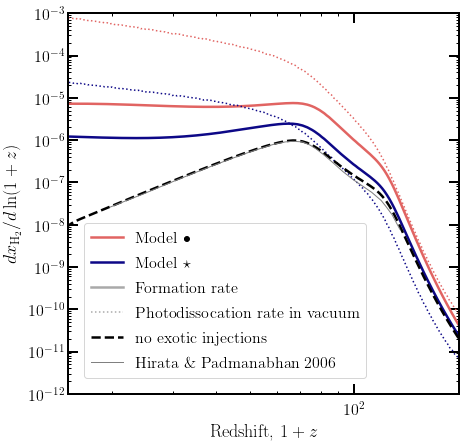

In [7]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.loglog()

plt.plot(rs_list, dxH2_dlogz['fast'], color=cfast, 
         label=r"Model $\bullet$")#fr"$\chi \rightarrow e^+ e^-$, $m_\chi$ = {DH_data['fast']['DM_params']['mDM']/1e6:.0f} MeV, "+r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data['fast']['DM_params']['inj_param']):.1f}")
plt.plot(rs_list, dxH2_dlogz['slow'], color=cslow, 
         label=r"Model $\star$")#fr"$\chi \rightarrow e^+ e^-$, $m_\chi$ = {DH_data['slow']['DM_params']['mDM']/1e6:.0f} MeV, "+r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data['slow']['DM_params']['inj_param']):.1f}")
plt.plot(rs_list, kH2['fast']*xH2['fast'], color=cfast, linestyle=':', linewidth=1.5)
plt.plot(rs_list, kH2['slow']*xH2['slow'], color=cslow, linestyle=':', linewidth=1.5)

plt.plot([0], color='darkgrey', label='Formation rate')
plt.plot([0], color='darkgrey', linestyle=':', linewidth=1.5, label='Photodissocation rate in vacuum')

plt.plot(rs_list, dxH2_dlogz['LCDM'], 'k--', label='no exotic injections')
plt.plot(rate_Hir_new[:,0], rate_Hir_new[:,1], 'grey', linewidth=1, label='Hirata \& Padmanabhan 2006')

plt.xlim(15,200)
plt.ylim(1e-12, 1e-3)
plt.xlabel(r'Redshift, $1+z$')
plt.ylabel(r'$dx_{\mathrm{H}_2} / d \ln(1+z)$')
plt.legend(loc='best')
plt.savefig(fig_dir+'LW_H2_rates_DM.pdf')
plt.show()

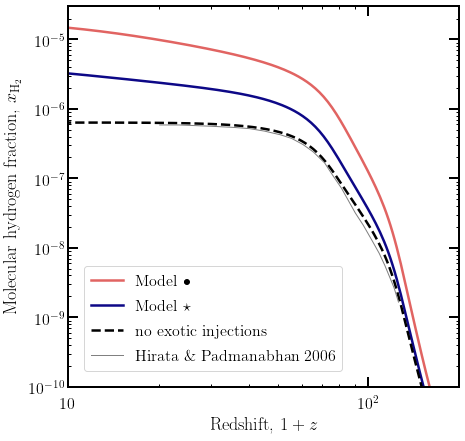

In [8]:
plt.figure(figsize=(7,7))
plt.loglog()

plt.plot(rs_list, xH2['fast'], color=cfast, 
         label=r"Model $\bullet$")# fr"$\chi \rightarrow e^+ e^-$, $m_\chi$ = {DH_data['fast']['DM_params']['mDM']/1e6:.0f} MeV, "+r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data['fast']['DM_params']['inj_param']):.1f}")
plt.plot(rs_list, xH2['slow'], color=cslow, 
         label=r"Model $\star$")# fr"$\chi \rightarrow e^+ e^-$, $m_\chi$ = {DH_data['slow']['DM_params']['mDM']/1e6:.0f} MeV, "+r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data['slow']['DM_params']['inj_param']):.1f}")
plt.plot(rs_list, xH2['LCDM'], 'k--', label='no exotic injections')
plt.plot(xH2_Hir_new[:,0], xH2_Hir_new[:,1], 'grey', linewidth=1, label='Hirata \& Padmanabhan 2006')

plt.xlim(10,200)
plt.ylim(1e-10, 3e-5)
plt.xlabel(r'Redshift, $1+z$')
plt.ylabel(r'Molecular hydrogen fraction, $x_{\mathrm{H}_2}$')
plt.legend(loc='best')
plt.savefig(fig_dir+'H2_abun_DM.pdf')
plt.show()

# Examples of halo evolution, with and without energy injection

Using rs_vir = 20,
M_halo = 1434789.7020351316 solar masses,
T_vir = 1600 K.
using collapse factor 0.75
Halo collapses? True


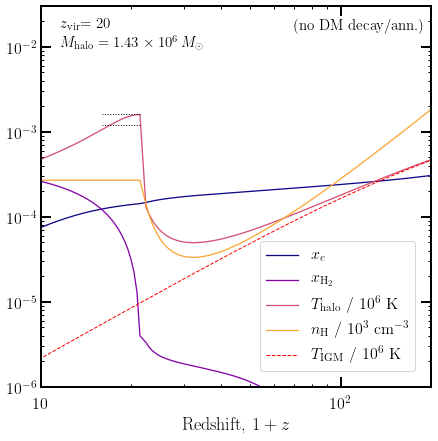

In [14]:
%autoreload
start_rs = 2000.
end_rs = 4.

rs_vir = 20
Tvir = 1.6e3 * phys.kB
M_halo = M_given_T(rs_vir, Tvir)#phys.TCMB(rs_vir))
init_H2 = [1e-10]

print(f"Using rs_vir = {rs_vir},") 
print(f"M_halo = {M_halo} solar masses,")
print(f"T_vir = {T_vir(rs_vir, M_halo)/phys.kB:.0f} K.")

halo_data = {}
rs_vir_actual = {}

for key in ['fast', 'slow']: #DH_data.keys():
    if key=='LCDM':
        DM_switch = False
    else:
        DM_switch = True

    halo_data[key], rs_vir_actual[key] = halo_integrate(
        rs_vir, M_halo, init_H2, start_rs=start_rs, end_rs=end_rs,
        dists=specs_list[key], DM_switch=DM_switch, DM_args=data_list[key]
    )    
    if key != 'LCDM':
        halo_data[key+' LW'], rs_vir_actual[key+' LW'] = halo_integrate(
            rs_vir, M_halo, init_H2, start_rs=start_rs, end_rs=end_rs,
            dists=specs_list[key], DM_switch=DM_switch, DM_args=data_list[key],
            LW=True
        )
        # halo_data[key+' fhalo'], rs_vir_actual[key+' fhalo'] = halo_integrate(
        #     rs_vir, M_halo, init_H2, start_rs=start_rs, end_rs=end_rs,
        #     dists=specs_list[key], DM_switch=DM_switch, DM_args=data_list[key], 
        #     f_suppress=True
        # )
    print("Halo collapses?", collapse_criterion(halo_data[key]['t'], halo_data[key]['y'][2], rs_vir_actual[key]))

    # Get rid of discontinuity
    discont_mask = np.roll(halo_data[key]['t'] != rs_vir_actual[key], -1)
    # discont_mask_fs = np.roll(halo_data[key+' fhalo']['t'] != rs_vir_actual[key+' fhalo'], -1)

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()

    plt.plot(halo_data[key]['t'][discont_mask], halo_data[key]['y'][0][discont_mask], 
             linewidth=1.3,color=cmap[0], label=r'$x_e$')
    plt.plot(halo_data[key]['t'][discont_mask], halo_data[key]['y'][1][discont_mask], 
             linewidth=1.3,color=cmap[1], label=r'$x_{\mathrm{H}_2}$')
    plt.plot(halo_data[key]['t'][discont_mask], halo_data[key]['y'][2][discont_mask] / phys.kB / 1e6, 
             linewidth=1.3,color=cmap[2], label=r'$T_\mathrm{halo}$ / 10$^6$ K')
    plt.plot(halo_data[key]['t'][discont_mask], halo_data[key]['y'][3][discont_mask] / 1e3, 
             linewidth=1.3,color=cmap[3], label=r'$n_\mathrm{H}$ / 10$^3$ cm$^{-3}$')
    
    if key != 'LCDM':
        discont_mask_LW = np.roll(halo_data[key+' LW']['t'] != rs_vir_actual[key+' LW'], -1)
        plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][0][discont_mask_LW], 
                linewidth=1.3,color=cmap[0], linestyle=':')
        plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][1][discont_mask_LW], 
                linewidth=1.3,color=cmap[1], linestyle=':')
        plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][2][discont_mask_LW] / phys.kB / 1e6, 
                linewidth=1.3,color=cmap[2], linestyle=':')
        plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][3][discont_mask_LW] / 1e3, 
                linewidth=1.3,color=cmap[3], linestyle=':')

    plt.plot(rs_list, phys.Tm_std(rs_list) / phys.kB / 1e6, label=r'$T_\mathrm{IGM}$ / 10$^6$ K',
            linewidth=1, linestyle='--', color='r')
    # plt.plot(rs_list, phys.nH * rs_list**3 / 1e3, label=r'IGM density / 10$^3$ cm$^{-3}$',
    #         linewidth=1, linestyle='--', color='grey')

    # plt.scatter([rs_vir_actual[key], 0.75*rs_vir_actual[key]], [Tvir/phys.kB/1e6, 0.75*Tvir/phys.kB/1e6],
    #         color='k', marker='*', zorder=20)
    # plt.vlines([rs_vir_actual[key], 0.75*rs_vir_actual[key]], 1e-7, 1, linewidth=1, linestyle=':', alpha=0.5)
    plt.hlines([Tvir/phys.kB/1e6, 0.75*Tvir/phys.kB/1e6], 
               rs_vir_actual[key], 0.75*rs_vir_actual[key], 
               linewidth=1, linestyle=':', color='k', zorder=20)
    plt.axis([10, 200, 1e-6, 3e-2])


    # Make a second legend if including LW
    nLW, = plt.plot([0,0], color='k', linewidth=1.3)
    wLW, = plt.plot([0,0], color='k', linewidth=1.3, linestyle=':')
    lLW = plt.legend([nLW, wLW], ["total self-shielding", "no self-shielding"], loc='lower left')

    plt.legend(loc='lower right')
    ax.add_artist(lLW)
    plt.xlabel(r'Redshift, $1+z$')
    plt.text(0.05, 0.94, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=15, transform = ax.transAxes)
    plt.text(0.05, 0.89, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=15, transform = ax.transAxes)
    if key != 'LCDM':
        if key == 'fast':
            plt.text(0.65, 0.94, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
        else:
            plt.text(0.65, 0.94, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.89, fr"$\chi \rightarrow e^+ e^-$,", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.84, fr"$m_\chi$ = {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.79, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes)
    else:
        plt.text(0.65, 0.94, fr"(no DM decay/ann.)", fontsize=15, transform = ax.transAxes)

    plt.savefig(fig_dir+f'LW_halo_evol_zvir{rs_vir:.0f}_M{M_halo:.2E}_{key}.pdf')
    plt.show()

# Critical curves for virial temperature and halo mass

Add effects of exotic heating/ionization/spectral distortions individually and all together.

In [5]:
dir_fid = "/Users/viviesque/Dropbox (MIT)/H2 cooling/Data/fiducial/"
crit_data = {
    'fast' : {},
    'slow' : {}
}

# LCDM
crit_data['LCDM'] = pickle.load(open(dir_fid+f'critical_collapse_LCDM_dist.p', 'rb'))

# DM model 1
crit_data['fast']['full'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_25.5556_full.p', 'rb'))
crit_data['fast']['full+LW'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_25.5556_full+LW.p', 'rb'))
crit_data['fast']['heat'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_25.5556_heat.p', 'rb'))
crit_data['fast']['ion']  = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_25.5556_ion.p', 'rb'))
crit_data['fast']['dist'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_25.5556_dist.p', 'rb'))
crit_data['fast']['LW'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_25.5556_LW.p', 'rb'))

# DM model 2
crit_data['slow']['full'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_26.4444_full.p', 'rb'))
crit_data['slow']['full+LW'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_26.4444_full+LW.p', 'rb'))
crit_data['slow']['heat'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_26.4444_heat.p', 'rb'))
crit_data['slow']['ion']  = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_26.4444_ion.p', 'rb'))
crit_data['slow']['dist'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_26.4444_dist.p', 'rb'))
crit_data['slow']['LW'] = pickle.load(open(dir_fid+f'critical_collapse_elec_decay_log10mDM_8.2667_log10param_26.4444_LW.p', 'rb'))

In [6]:
# # Repackage some data for Julian to run in Zeus21

# for key in ['fast', 'slow']:
#     temp = np.transpose(np.array([
#         crit_data[key]['full']['rs'],
#         crit_data[key]['full']['T_vir'],
#         M_given_T(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir'])
#     ]))
#     np.savetxt(
#         output_dir+"collapse_data_"
#         +DH_data[key]['DM_params']['pri']+'_'
#         +DH_data[key]['DM_params']['DM_process']+'_'
#         +f"log10mDM_{np.log10(DH_data[key]['DM_params']['mDM']):2.4f}_"
#         +f"log10param_{np.log10(DH_data[key]['DM_params']['inj_param']):2.4f}"
#         +'.txt',
#         temp
#     )

In [7]:
# for key in ['fast', 'slow']:
#     res = shooting_scheme(
#         crit_data['LCDM']['rs'], dists=specs_list[key], LW=True,
#         DM_switch=True, DM_args=data_list[key]
#     )    
#     pickle.dump(
#         res, open(dir_fid+'critical_collapse_'
#         +DH_data[key]['DM_params']['pri']+'_'
#         +DH_data[key]['DM_params']['DM_process']+'_'
#         +f"log10mDM_{np.log10(DH_data[key]['DM_params']['mDM']):2.4f}_"
#         +f"log10param_{np.log10(DH_data[key]['DM_params']['inj_param']):2.4f}"
#         +'_full+LW.p','wb')
#     )

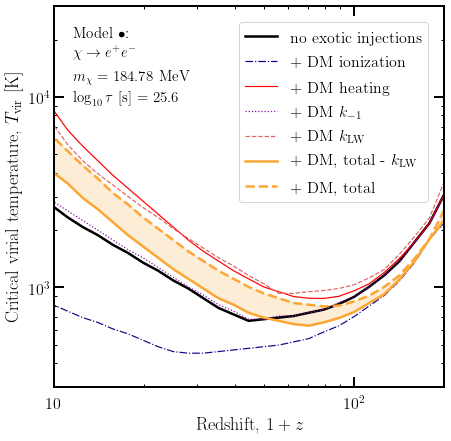

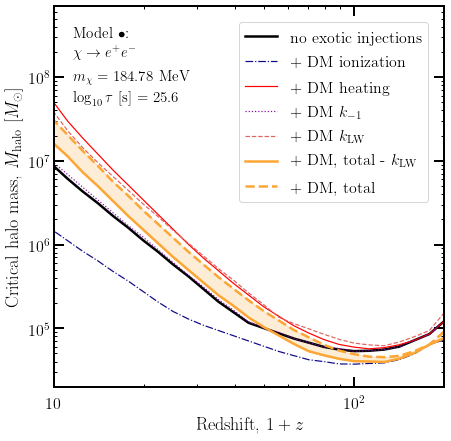

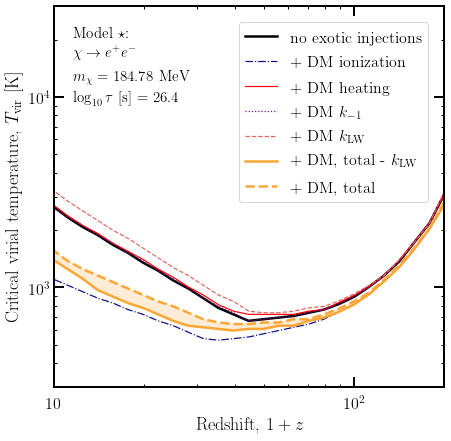

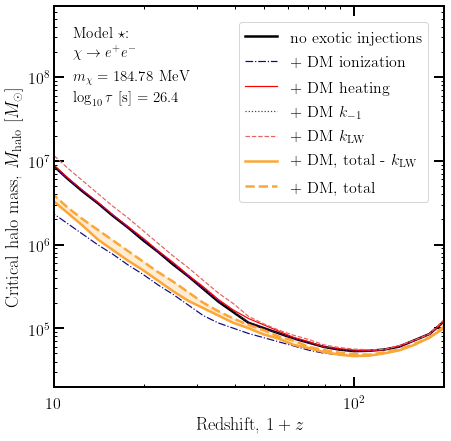

In [7]:
# Show effect of adding source terms one at a time
thick = 2.5
thin = 1.2
for key in ['fast','slow']:
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()
    plt.plot(crit_data['LCDM']['rs'], crit_data['LCDM']['T_vir'] / phys.kB, 
            color='k', linestyle='-', linewidth=thick, label=r'no exotic injections')
    plt.plot(crit_data[key]['ion']['rs'], crit_data[key]['ion']['T_vir'] / phys.kB, 
            color=cslow, linestyle='-.', linewidth=thin, label='+ DM ionization')
    plt.plot(crit_data[key]['heat']['rs'], crit_data[key]['heat']['T_vir'] / phys.kB, 
            color='r', linestyle='-', linewidth=thin, label='+ DM heating')
    plt.plot(crit_data[key]['dist']['rs'], crit_data[key]['dist']['T_vir'] / phys.kB, 
            color=cmap[1], linestyle=':', linewidth=thin, label=r'+ DM $k_{-1}$')
    plt.plot(crit_data[key]['LW']['rs'], crit_data[key]['LW']['T_vir'] / phys.kB, 
            color=cfast, linestyle='--', linewidth=thin, label='+ DM $k_\mathrm{LW}$')
    plt.plot(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir'] / phys.kB, 
            color=cmap[3], linewidth=thick, label=r'+ DM, total - $k_\mathrm{LW}$')
    plt.plot(crit_data[key]['full+LW']['rs'], crit_data[key]['full+LW']['T_vir'] / phys.kB, 
            color=cmap[3], linewidth=thick, linestyle='--', label=r'+ DM, total')
    plt.fill_between(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir'] / phys.kB, crit_data[key]['full+LW']['T_vir'] / phys.kB, 
            color=cmap[3], alpha=0.2)

    plt.axis([10,200,3e2,3e4])

    if key == 'fast':
        plt.text(0.05, 0.92, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
    else:
        plt.text(0.05, 0.92, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
    plt.text(0.05, 0.87, r'$\chi \rightarrow e^+ e^-$', fontsize=15, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.text(0.05, 0.80, fr"$m_\chi =$ {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.text(0.05, 0.74, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.xlabel(r"Redshift, $1+z$")
    plt.ylabel(r"Critical virial temperature, $T_{\mathrm{vir}}$ [K]")
    plt.legend(loc='upper right')

    plt.savefig(fig_dir+'crit_Tvir_'
                +DH_data[key]['DM_params']['pri']+'_'
                +DH_data[key]['DM_params']['DM_process']+'_'
                +f"log10mDM_{np.log10(DH_data[key]['DM_params']['mDM']):2.4f}_"
                +f"log10param_{np.log10(DH_data[key]['DM_params']['inj_param']):2.4f}"
                +'.pdf')
    plt.show()

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()
    plt.plot(crit_data['LCDM']['rs'], M_given_T(crit_data['LCDM']['rs'], crit_data['LCDM']['T_vir']), #crit_data['LCDM']['M_halo'], 
            color='k', linestyle='-', linewidth=thick, label=r'no exotic injections')
    plt.plot(crit_data[key]['ion']['rs'], M_given_T(crit_data[key]['ion']['rs'], crit_data[key]['ion']['T_vir']), #crit_data[key]['ion']['M_halo'],
            color=cslow, linestyle='-.', linewidth=thin, label='+ DM ionization')
    plt.plot(crit_data[key]['heat']['rs'], M_given_T(crit_data[key]['heat']['rs'], crit_data[key]['heat']['T_vir']), #crit_data[key]['heat']['M_halo'],
            color='r', linestyle='-', linewidth=thin, label='+ DM heating')
    plt.plot(crit_data[key]['dist']['rs'], M_given_T(crit_data[key]['dist']['rs'], crit_data[key]['dist']['T_vir']), #crit_data[key]['dist']['M_halo'],
            color=cmap[1], linestyle=':', linewidth=thin, label=r'+ DM $k_{-1}$')
    plt.plot(crit_data[key]['LW']['rs'], M_given_T(crit_data[key]['LW']['rs'], crit_data[key]['LW']['T_vir']), #crit_data[key]['dist']['M_halo'],
            color=cfast, linestyle='--', linewidth=thin, label='+ DM $k_\mathrm{LW}$')
    plt.plot(crit_data[key]['full']['rs'], M_given_T(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir']), #crit_data[key]['full']['M_halo'], 
            color=cmap[3], linewidth=thick, label=r'+ DM, total - $k_\mathrm{LW}$')
    plt.plot(crit_data[key]['full+LW']['rs'], M_given_T(crit_data[key]['full+LW']['rs'], crit_data[key]['full+LW']['T_vir']), 
            color=cmap[3], linewidth=thick, linestyle='--', label=r'+ DM, total')
    plt.fill_between(crit_data[key]['full']['rs'], 
                     M_given_T(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir']), 
                     M_given_T(crit_data[key]['full+LW']['rs'], crit_data[key]['full+LW']['T_vir']), 
                     color=cmap[3], alpha=0.2)

    plt.axis([10,200,2e4,7e8])
    if key == 'fast':
        plt.text(0.05, 0.92, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
    else:
        plt.text(0.05, 0.92, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
    plt.text(0.05, 0.87, r'$\chi \rightarrow e^+ e^-$', fontsize=15, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.text(0.05, 0.80, fr"$m_\chi =$ {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.text(0.05, 0.74, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.xlabel(r"Redshift, $1+z$")
    plt.ylabel(r"Critical halo mass, $M_\mathrm{halo}$ [$M_\odot$]")
    plt.legend(loc='upper right')

    plt.savefig(fig_dir+'crit_Mhalo_'
                +DH_data[key]['DM_params']['pri']+'_'
                +DH_data[key]['DM_params']['DM_process']+'_'
                +f"log10mDM_{np.log10(DH_data[key]['DM_params']['mDM']):2.4f}_"
                +f"log10param_{np.log10(DH_data[key]['DM_params']['inj_param']):2.4f}"
                +'.pdf')
    plt.show()

# Change in critical collapse parameters from LCDM is plotted in `H2_constraints.ipynb`

# Change to 21 cm signals with fiducial DM models

In [8]:
global21 = np.load(output_dir+"Zeus21_GlobalDat.npz")
print(global21.files)

['name1', 'name2', 'name3', 'name4', 'name5', 'name6']


In [14]:
global21 = np.load(output_dir+"Zeus21_GlobalDat.npz")
global21 = {
    'rs' : 1+global21['name1'],
    'noDM' : global21['name2'],
    'fast+LW' : global21['name3'],
    'fast' : global21['name4'],
    'slow+LW' : global21['name5'],
    'slow' : global21['name6'],
}

pspec21_k02 = np.load(output_dir+"Zeus21_PSDat_k02.npz")
pspec21_k02 = {
    'rs' : 1+pspec21_k02['name1'],
    'noDM' : pspec21_k02['name2'],
    'fast+LW' : pspec21_k02['name3'],
    'fast' : pspec21_k02['name4'],
    'slow+LW' : pspec21_k02['name5'],
    'slow' : pspec21_k02['name6'],
}

pspec21_k05 = np.load(output_dir+"Zeus21_PSDat_k05.npz")
pspec21_k05 = {
    'rs' : 1+pspec21_k05['name1'],
    'noDM' : pspec21_k05['name2'],
    'fast+LW' : pspec21_k05['name3'],
    'fast' : pspec21_k05['name4'],
    'slow+LW' : pspec21_k05['name5'],
    'slow' : pspec21_k05['name6'],
}

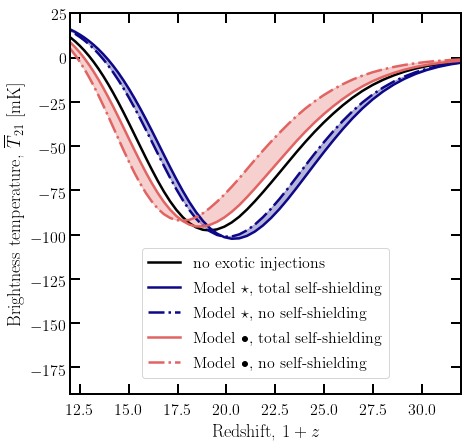

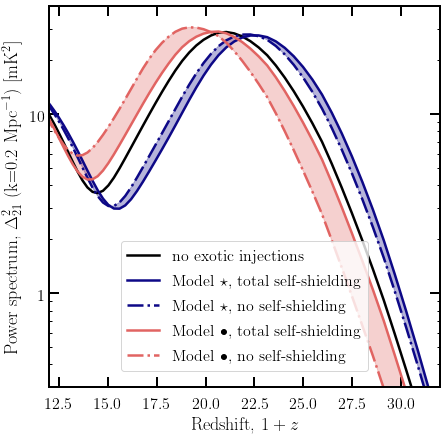

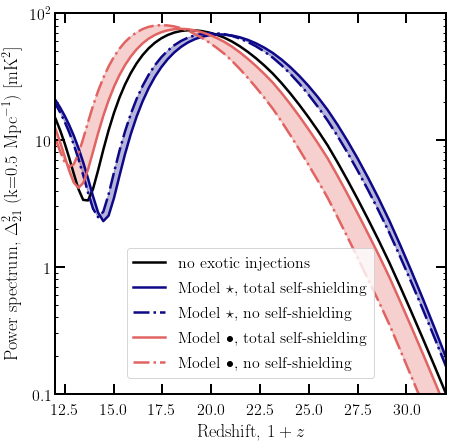

In [22]:
plt.figure(figsize=(7,7))
plt.xlim(12,32)
plt.ylim(-190, 25)
plt.plot(global21['rs'], global21['noDM'], 'k', label=r'no exotic injections')
plt.plot(global21['rs'], global21['slow'], color=cslow, label=r"Model $\star$, total self-shielding")
plt.plot(global21['rs'], global21['slow+LW'], color=cslow, linestyle='-.', label=r"Model $\star$, no self-shielding")
plt.fill_between(global21['rs'], global21['slow'], global21['slow+LW'], color=cslow, alpha=.3)
plt.plot(global21['rs'], global21['fast'], color=cfast, label=r"Model $\bullet$, total self-shielding")
plt.plot(global21['rs'], global21['fast+LW'], color=cfast, linestyle='-.', label=r"Model $\bullet$, no self-shielding")
plt.fill_between(global21['rs'], global21['fast'], global21['fast+LW'], color=cfast, alpha=.3)
plt.xlabel(r"Redshift, $1+z$")
plt.ylabel(r"Brightness temperature, $\overline{T}_{21}$ [mK]")
plt.legend(loc='lower center')
plt.savefig(fig_dir+'21cm_global.pdf')
plt.show()

plt.figure(figsize=(7,7))
plt.yscale('log')
plt.xlim(12,32)
plt.ylim(0.3,40)
plt.plot(pspec21_k02['rs'], pspec21_k02['noDM'], 'k', label=r'no exotic injections')
plt.plot(pspec21_k02['rs'], pspec21_k02['slow'], color=cslow, label=r"Model $\star$, total self-shielding")
plt.plot(pspec21_k02['rs'], pspec21_k02['slow+LW'], color=cslow, linestyle='-.', label=r"Model $\star$, no self-shielding")
plt.fill_between(pspec21_k02['rs'], pspec21_k02['slow'], pspec21_k02['slow+LW'], color=cslow, alpha=.3)
plt.plot(pspec21_k02['rs'], pspec21_k02['fast'], color=cfast, label=r"Model $\bullet$, total self-shielding")
plt.plot(pspec21_k02['rs'], pspec21_k02['fast+LW'], color=cfast, linestyle='-.', label=r"Model $\bullet$, no self-shielding")
plt.fill_between(pspec21_k02['rs'], pspec21_k02['fast'], pspec21_k02['fast+LW'], color=cfast, alpha=.3)
plt.xlabel(r"Redshift, $1+z$")
plt.ylabel(r"Power spectrum, $\Delta^2_{21}$ (k=0.2 Mpc$^{-1}$) [mK$^2$]")
plt.legend(loc='lower center')
plt.savefig(fig_dir+'21cm_pspec_k02.pdf')
plt.show()

plt.figure(figsize=(7,7))
plt.yscale('log')
plt.xlim(12,32)
plt.ylim(0.1,100)
plt.plot(pspec21_k05['rs'], pspec21_k05['noDM'], 'k', label=r'no exotic injections')
plt.plot(pspec21_k05['rs'], pspec21_k05['slow'], color=cslow, label=r"Model $\star$, total self-shielding")
plt.plot(pspec21_k05['rs'], pspec21_k05['slow+LW'], color=cslow, linestyle='-.', label=r"Model $\star$, no self-shielding")
plt.fill_between(pspec21_k05['rs'], pspec21_k05['slow'], pspec21_k05['slow+LW'], color=cslow, alpha=.3)
plt.plot(pspec21_k05['rs'], pspec21_k05['fast'], color=cfast, label=r"Model $\bullet$, total self-shielding")
plt.plot(pspec21_k05['rs'], pspec21_k05['fast+LW'], color=cfast, linestyle='-.', label=r"Model $\bullet$, no self-shielding")
plt.fill_between(pspec21_k05['rs'], pspec21_k05['fast'], pspec21_k05['fast+LW'], color=cfast, alpha=.3)
plt.xlabel(r"Redshift, $1+z$")
plt.ylabel(r"Power spectrum, $\Delta^2_{21}$ (k=0.5 Mpc$^{-1}$) [mK$^2$]")
plt.legend(loc='lower center')
plt.savefig(fig_dir+'21cm_pspec_k05.pdf')
plt.show()

# Lyman-Werner flux

In [11]:
key = 'fast'
print(DH_data[key]['DM_params']['mDM']/1e6)
print(np.log10(DH_data[key]['DM_params']['inj_param']))

dir_str = '/Users/viviesque/Dropbox (MIT)/DarkHistory_V2/data/HL_hyrec_comparison_runs/'
no_DM = pickle.load(open(dir_str+'phot_decay_log10mDM_8.0000_log10param_40.0000_no_DM_nmax_200_reprocessed_ind_0.p', 'rb'))

184.7849797422287
25.555555555555557


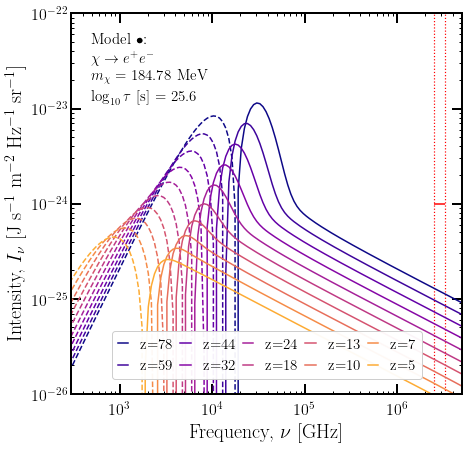

In [12]:
skip = 18
hplanck = phys.hbar * 2*np.pi
cmap = cm.plasma(np.linspace(0.,.9,len(rs_list[(rs_list < 120)*(rs_list > 5)][::skip])))

plt.figure(figsize=(7,7))
plt.loglog()
ax = plt.gca()

# Plot distortion at every 20th redshift step
for ii, rs in enumerate(rs_list[(rs_list < 80)*(rs_list > 5)][::skip]):
    ii_actual = np.argwhere(rs_list == rs_list[rs_list < 120][0])[0,0] + ii*skip
    # With DM
    temp_dist = DH_data[key]['data'][-1]['lowengphot'].copy()
    temp_dist.redshift(rs)
    weights = np.zeros_like(rs_list)
    weights[:ii_actual] = 1
    temp_dist = {'distortion': temp_dist.sum_specs(weight=weights)}
    # Without DM
    temp_dist_LCDM = no_DM['data'][-1]['lowengphot'].copy()
    temp_dist_LCDM.redshift(rs)
    weights = np.zeros_like(rs_list)
    weights[:ii_actual] = 1
    temp_dist_LCDM = {'distortion': temp_dist_LCDM.sum_specs(weight=weights)}
    
    # plot_distortion(ax, temp_dist, label=f'z={rs-1:.0f}', color=cmap[ii], leg=True, first=False)
    plt.plot(temp_dist['distortion'].eng / hplanck / 1e9, 
         (temp_dist['distortion'].dNdE - temp_dist_LCDM['distortion'].dNdE) * phys.nB * rs**3 * temp_dist['distortion'].eng * hplanck * phys.c / (4*np.pi) * phys.ele * 1e4, 
         label=f"z={rs-1:.0f}", color=cmap[ii], linewidth=1.5)
    plt.plot(temp_dist['distortion'].eng / hplanck / 1e9, 
         - (temp_dist['distortion'].dNdE - temp_dist_LCDM['distortion'].dNdE) * phys.nB * rs**3 * temp_dist['distortion'].eng * hplanck * phys.c / (4*np.pi) * phys.ele * 1e4, 
         color=cmap[ii], linewidth=1.5, linestyle='--')

# Lines to demarcate Lyman-Werner band, as well as critical flux
lya_freq = phys.lya_eng / hplanck / 1e9
ryd_freq = phys.rydberg / hplanck / 1e9
plt.vlines(lya_freq, 1e-50, 1e-15, linewidth=1.2,  color='r', linestyle=':')
plt.vlines(ryd_freq, 1e-50, 1e-15, linewidth=1.2,  color='r', linestyle=':')
plt.hlines(1e-21 / 1e7 * 1e4, lya_freq, ryd_freq, linewidth=1.5,  color='r')

# plt.axis([300, 5e6, 1e-34, 1e-23])
plt.axis([300, 5e6, 1e-26, 1e-22])
plt.xlabel(r'Frequency, $\nu$ [GHz]', fontsize=20)
plt.ylabel(r'Intensity, $I_{\nu}$ [J s$^{-1}$ m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]', fontsize=20)
if key == 'fast':
     plt.text(0.05, 0.92, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
else:
     plt.text(0.05, 0.92, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
plt.text(0.05, 0.87, r'$\chi \rightarrow e^+ e^-$', fontsize=15, transform = ax.transAxes,
          bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
plt.text(0.05, 0.82, fr"$m_\chi =$ {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes,
          bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
plt.text(0.05, 0.76, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes,
          bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
plt.legend(loc='lower center', ncol=5, handlelength=0.7, fontsize=15, 
           columnspacing=0.5, framealpha=0.95)

plt.savefig(fig_dir+'Lyman-Werner.pdf')
plt.show()

# Other reaction rates

In [13]:
# For validation: H + e- -> H- + photon
def k1_GP(temp_eV):
    T = temp_eV / phys.kB
    return (
        1.4e-18 * T**0.928 * np.exp(-T/16200)
    )

def k1_Abel(temp_eV):
    T = temp_eV / phys.kB
    return (
        1.429e-18 * T**0.7620 
        * T**(0.1523*np.log10(T)) 
        * T**(-3.274e-2*np.log10(T)**2)
    )

# H2 + e- -> H + H-
def H2_to_HH_GP(temp_eV):
    T = temp_eV / phys.kB
    return (
        2.7e-8 * T**-1.27 * np.exp(-43000/T)
    )

# H2 + e- -> 2H + e-
def H2_to_2H_Abel(temp_eV):
    T = temp_eV / phys.kB
    return  (
        5.6e-11 * np.sqrt(T) * np.exp(-102124/T)
    )

# H_2 + H -> 3H
def H2H_to_3H_Abel(temp_eV):
    T = temp_eV #/ phys.kB
    return  1.067e-10*T**2.012 * np.exp(-(4.463/T) * (1 + 0.2472*T)**3.512)

# H_2 + H^+ -> H_2^+ + H
def H2Hp_to_H2pH_Abel(temp_eV):
    T = temp_eV #/ phys.kB
    return (
        np.exp(-24.24914687 +  3.40082444 * np.log(T) 
            - 3.89800396 * np.log(T)**2
            + 2.04558782 * np.log(T)**3
            - 0.541618285 * np.log(T)**4
            + 8.41077503e-2 * np.log(T)**5
            - 7.87902615e-3 * np.log(T)**6
            + 4.13839842e-4 * np.log(T)**7
            - 9.36345888e-6 * np.log(T)**8)
    )

# H- + e- -> H + 2e-
def Hm_to_H_Abel(temp_eV):
    T = temp_eV #/ phys.kB
    return (
        np.exp(-18.01849334 + 2.3608522 * np.log(T) 
            - 0.28274430 * np.log(T)**2
            + 1.62331664e-2 * np.log(T)**3
            - 3.36501203e-2 * np.log(T)**4
            + 1.17832978e-2 * np.log(T)**5
            - 1.65619470e-3 * np.log(T)**6
            + 1.06827520e-4 * np.log(T)**7
            - 2.63128581e-6 * np.log(T)**8)
    )

# H- + H -> 2H + e-
def HmH_to_2H_Abel(temp_eV):
    T = temp_eV #/ phys.kB
    Tbig = T[temp_eV > 0.1]
    krate = 2.5634e-9 * T**1.78186
    krate[temp_eV > 0.1] = np.exp(
        -20.37260896 + 1.13944933 * np.log(Tbig) 
        - 0.14210135 * np.log(Tbig)**2
        + 8.4644554e-3 * np.log(Tbig)**3
        - 1.4327641e-3 * np.log(Tbig)**4
        + 2.0122503e-4 * np.log(Tbig)**5
        - (- 8.6639632e-5 * np.log(Tbig)**6
        + 2.5850097e-5 * np.log(Tbig)**7
        - 2.4555012e-6 * np.log(Tbig)**8
        + 8.0683825e-8 * np.log(Tbig)**9)
    )
    return krate

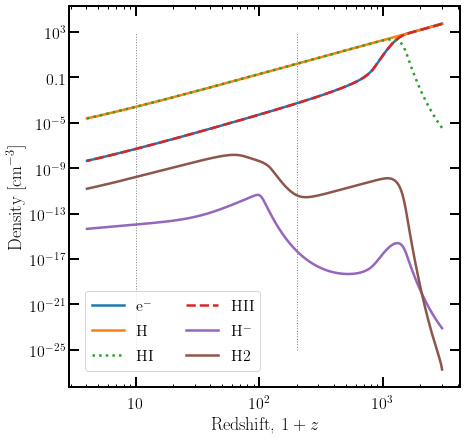

In [14]:
# IGM species abundances as a function of redshift
nB_IGM = phys.nB * (1+rs_list)**3
nH_IGM = phys.nH * (1+rs_list)**3
nH2_IGM = nH_IGM * xH2['LCDM']
nHI_IGM = nH_IGM * phys.x_std(rs_list, species='HI')
nHII_IGM = nH_IGM * phys.x_std(rs_list, species='HII')
ne_IGM = nH_IGM * (phys.x_std(rs_list, species='HII') + phys.x_std(rs_list, species='HeII'))
nHm_IGM = k1(DH_data[key]['data'][-1]['Tm']) * ne_IGM * nHI_IGM / (kn1(phys.TCMB(rs_list), 0, rs_list) + k2(DH_data[key]['data'][-1]['Tm'])*nHI_IGM + k3(DH_data[key]['data'][-1]['Tm'])*nHII_IGM)

plt.figure(figsize=(7,7))
plt.loglog()

plt.plot(rs_list, ne_IGM, label=r'e$^-$')
plt.plot(rs_list, nH_IGM, label='H')
plt.plot(rs_list, nHI_IGM, label='HI', linestyle=':')
plt.plot(rs_list, nHII_IGM, label='HII', linestyle='--')
plt.plot(rs_list, nHm_IGM, label=r'H$^-$')
plt.plot(rs_list, nH2_IGM, label='H2')
plt.vlines([10, 200], 1e-25, 1e3, color='gray', linestyle=':', linewidth=1)

plt.xlabel('Redshift, $1+z$')
plt.ylabel('Density [cm$^{-3}$]')
plt.legend(loc='best', ncol=2)
plt.show()


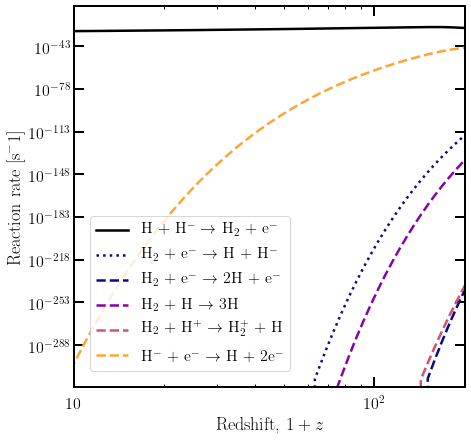

In [20]:
T_list = phys.Tm_std(rs_list)

plt.figure(figsize=(7,7))
plt.loglog()
ax = plt.gca()

plt.plot(T_list / phys.kB, k1(T_list) * nH_IGM * nHm_IGM / nB_IGM, 'k', label=r'H + H$^- \rightarrow$ H$_2$ + e$^-$')
# plt.plot(T_list / phys.kB, k1_Abel(T_list), label='k1, Abel')
# plt.plot(T_list / phys.kB, k1_GP(T_list), label='k1, GP')

plt.plot(T_list / phys.kB, H2_to_HH_GP(T_list) * nH2_IGM * ne_IGM / nB_IGM, color=cmap[0], 
         linestyle=':', label=r'H$_2$ + e$^- \rightarrow$ H + H$^-$')
plt.plot(T_list / phys.kB, H2_to_2H_Abel(T_list) * nH2_IGM * ne_IGM / nB_IGM, color=cmap[0], 
         linestyle='--', label=r'H$_2$ + e$^- \rightarrow$ 2H + e$^-$')
plt.plot(T_list / phys.kB, H2H_to_3H_Abel(T_list) * nH2_IGM * nHI_IGM / nB_IGM, color=cmap[1], 
         linestyle='--', label=r'H$_2$ + H $\rightarrow$ 3H')
plt.plot(T_list / phys.kB, H2Hp_to_H2pH_Abel(T_list) * nH2_IGM * nHII_IGM / nB_IGM, color=cmap[2], 
         linestyle='--', label=r'H$_2$ + H$^+ \rightarrow$ H$_2^+$ + H')
plt.plot(T_list / phys.kB, Hm_to_H_Abel(T_list) * nHm_IGM * ne_IGM / nB_IGM, color=cmap[3], 
         linestyle='--', label=r'H$^-$ + e$^- \rightarrow$ H + 2e$^-$')
# plt.plot(T_list / phys.kB, HmH_to_2H_Abel(T_list) * nHm_IGM * nHI_IGM / nB_IGM, color=cmap[0], 
#          linestyle='--', label=r'H$^-$ + H $\rightarrow$ 2H + e$^-$')

plt.xlim(10, 200)
# plt.ylim(1e-30, 1e0)
plt.xlabel(r'Redshift, $1+z$')
plt.ylabel(r'Reaction rate [s$^-1$]')
plt.legend(loc='best')

plt.savefig(fig_dir+'reaction_rates.pdf')
plt.show()

# Talk plot variations

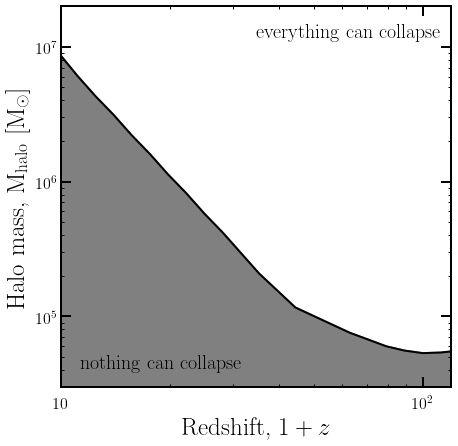

In [6]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.loglog()

plt.plot(crit_data['LCDM']['rs'], M_given_T(crit_data['LCDM']['rs'],crit_data['LCDM']['T_vir']), 
        color='k', linewidth=2, label=r'no energy injection')
plt.fill_between(crit_data['LCDM']['rs'], 0, M_given_T(crit_data['LCDM']['rs'],crit_data['LCDM']['T_vir']), 
        color='grey', linewidth=2, label=r'no energy injection')

plt.axis([10,120,3e4,2e7])
plt.xlabel(r"Redshift, $1+z$", fontsize=25)
plt.ylabel(r"Halo mass, M$_{\mathrm{halo}}$ [M$_\odot$]", fontsize=25)
plt.text(0.5, 0.92, r'everything can collapse', fontsize=20, transform = ax.transAxes,
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
plt.text(0.05, 0.05, r'nothing can collapse', fontsize=20, transform = ax.transAxes,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.8))

plt.savefig(fig_dir+'talk3.pdf')
plt.show()

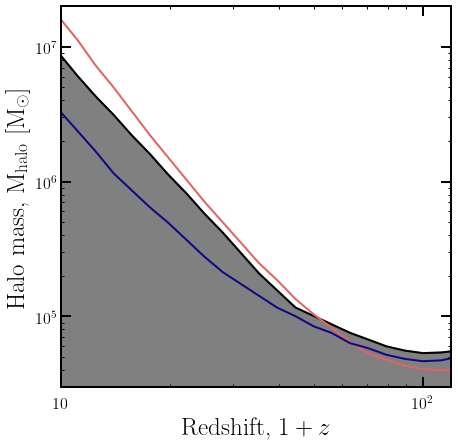

In [7]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.loglog()

plt.plot(crit_data['LCDM']['rs'], M_given_T(crit_data['LCDM']['rs'], crit_data['LCDM']['T_vir']), 
        color='k', linewidth=2, label=r'no energy injection')
plt.fill_between(crit_data['LCDM']['rs'], 0, M_given_T(crit_data['LCDM']['rs'], crit_data['LCDM']['T_vir']), 
        color='grey', linewidth=2, label=r'no energy injection')
plt.plot(crit_data['fast']['full']['rs'], M_given_T(crit_data['fast']['full']['rs'], crit_data['fast']['full']['T_vir']), 
        color=cfast, linewidth=2, label='+ DM, all effects')
plt.plot(crit_data['slow']['full']['rs'], M_given_T(crit_data['slow']['full']['rs'], crit_data['slow']['full']['T_vir']), 
        color=cslow, linewidth=2, label='+ DM, all effects')

plt.axis([10,120,3e4,2e7])
plt.xlabel(r"Redshift, $1+z$", fontsize=25)
plt.ylabel(r"Halo mass, M$_{\mathrm{halo}}$ [M$_\odot$]", fontsize=25)

plt.savefig(fig_dir+'talk4.pdf')
plt.show()

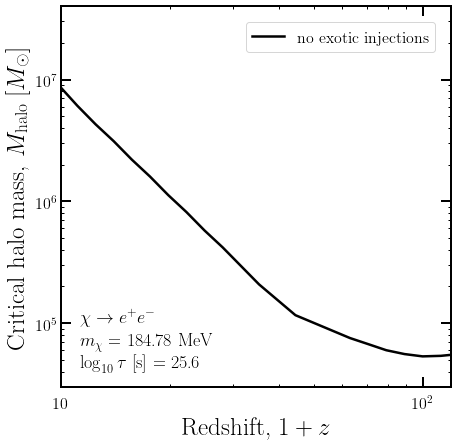

In [16]:
# Show effect of adding source terms one at a time
thick = 2.5
thin = 1.2
for key in ['fast']: #,'slow']:
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()
    plt.plot(crit_data['LCDM']['rs'], M_given_T(crit_data['LCDM']['rs'], crit_data['LCDM']['T_vir']), #crit_data['LCDM']['M_halo'], 
            color='k', linestyle='-', linewidth=thick, label=r'no exotic injections')
#     plt.plot(crit_data[key]['heat']['rs'], M_given_T(crit_data[key]['heat']['rs'], crit_data[key]['heat']['T_vir']), #crit_data[key]['heat']['M_halo'],
#             color='r', linestyle='-', linewidth=thin, label='+ DM heating')
#     plt.plot(crit_data[key]['ion']['rs'], M_given_T(crit_data[key]['ion']['rs'], crit_data[key]['ion']['T_vir']), #crit_data[key]['ion']['M_halo'],
#             color=cslow, linestyle='-.', linewidth=thin, label='+ DM ionization')
#     plt.plot(crit_data[key]['dist']['rs'], M_given_T(crit_data[key]['dist']['rs'], crit_data[key]['dist']['T_vir']), #crit_data[key]['dist']['M_halo'],
#             color=cmap[1], linestyle=':', linewidth=thin, label=r'+ DM $k_{-1}$')
#     plt.plot(crit_data[key]['LW']['rs'], M_given_T(crit_data[key]['LW']['rs'], crit_data[key]['LW']['T_vir']), #crit_data[key]['dist']['M_halo'],
#             color=cfast, linestyle='--', linewidth=thin, label='+ DM $k_\mathrm{LW}$')
#     plt.plot(crit_data[key]['full']['rs'], M_given_T(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir']), #crit_data[key]['full']['M_halo'], 
#             color=cmap[3], linewidth=thick, label=r'+ DM, total - $k_\mathrm{LW}$')
#     plt.plot(crit_data[key]['full+LW']['rs'], M_given_T(crit_data[key]['full+LW']['rs'], crit_data[key]['full+LW']['T_vir']), 
#             color=cmap[3], linewidth=thick, linestyle='--', label=r'+ DM, total')
#     plt.fill_between(crit_data[key]['full']['rs'], 
#                      M_given_T(crit_data[key]['full']['rs'], crit_data[key]['full']['T_vir']), 
#                      M_given_T(crit_data[key]['full+LW']['rs'], crit_data[key]['full+LW']['T_vir']), 
#                      color=cmap[3], alpha=0.2)

    plt.axis([10,120,3e4,4e7])
    plt.text(0.05, 0.17, r'$\chi \rightarrow e^+ e^-$', fontsize=18, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.text(0.05, 0.10, fr"$m_\chi =$ {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=18, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.text(0.05, 0.04, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=18, transform = ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    plt.xlabel(r"Redshift, $1+z$", fontsize=25)
    plt.ylabel(r"Critical halo mass, $M_\mathrm{halo}$ [$M_\odot$]", fontsize=25)
    plt.legend(loc='upper right')

    plt.savefig('/Users/viviesque/OneDrive - Massachusetts Institute of Technology/DarkHistory/H2_figs/talk5.pdf') # series starts at talk5
    plt.show()

# Scattering length plot

In [6]:
from config import load_data
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec

binning = load_data('binning')
photeng = binning['phot']
eleceng = binning['elec']
beta_list = np.sqrt(1 - 1/(1+eleceng/phys.me)**2)

plot_rs = np.array([20, 100]) #np.logspace(np.log10(4), np.log10(3000), num=50)

dE_ICS_dt = np.zeros((len(plot_rs),len(eleceng)))
dE_heat_dt = np.zeros((len(plot_rs),len(eleceng)))

length_photo_ion = np.zeros((len(plot_rs),len(eleceng)))
length_coll_ion = np.zeros((len(plot_rs),len(eleceng)))
length_coll_exc = np.zeros((len(plot_rs),len(eleceng)))

for ii, rs in enumerate(plot_rs):
    # ICS
    engloss_ICS_tf = engloss_spec(
        eleceng, delta=photeng, T=phys.TCMB(rs)
    )
    dE_ICS_dt[ii] = engloss_ICS_tf.toteng()

    # Heating
    dE_heat_dt[ii] = phys.elec_heating_engloss_rate(
        eleceng, 1e-3, rs, Te=phys.Tm_std(rs)
    )

    length_photo_ion[ii] = 1. / (phys.nH * rs**3) / phys.photo_ion_xsec(photeng, species='HI')
    length_coll_ion[ii] = 1. / (phys.nH * rs**3) / phys.coll_ion_xsec(eleceng, species='HI')
    length_coll_exc[ii] = 1. / (phys.nH * rs**3) / phys.coll_exc_xsec(eleceng, species='HI')

# Fix negative length values
length_coll_ion[length_coll_ion < 0] *= -1
length_coll_exc[length_coll_exc < 0] *= -1

###### RELATIVISTIC ENERGY LOSS SPECTRUM ######
Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!
###### COMPLETE! ######
###### THOMSON ENERGY LOSS SPECTRUM ######
****** Energy Loss Spectrum by beta Expansion ******
    Computing integrals 1/6...
    Computing integrals 2/6...
    Computing integrals 3/6...
    Computing integrals 4/6...
    Computing integrals 5/6...
    Computing integrals 6/6...
    Integrals computed!


../darkhistory/electrons/ics/BE_integrals.py:921: RuntimeWarning: overflow encountered in exp
  lambda x: 1/(x**n*(np.exp(x) - 1)),


****** Complete! ******
****** Energy Loss Spectrum by Analytic Series ******
Computing upscattering loss spectra...
    Computing series 1/8...
    Computing series 2/8...
    Computing series 3/8...
    Computing series 4/8...
    Computing series 5/8...
    Computing series 6/8...
    Computing series 7/8...
    Computing series 8/8...
Computing downscattering loss spectra...
    Computing series 1/8...
    Computing series 2/8...
    Computing series 3/8...
    Computing series 4/8...
    Computing series 5/8...
    Computing series 6/8...
    Computing series 7/8...
    Computing series 8/8...
****** Complete! ******
###### COMPLETE! ######
###### RELATIVISTIC ENERGY LOSS SPECTRUM ######
Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...


/Users/viviesque/opt/anaconda3/envs/DarkHistoryEnvironment/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/viviesque/opt/anaconda3/envs/DarkHistoryEnvironment/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/Users/viviesque/opt/anaconda3/envs/DarkHistoryEnvironment/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


Relativistic Computation Complete!
###### COMPLETE! ######
###### THOMSON ENERGY LOSS SPECTRUM ######
****** Energy Loss Spectrum by beta Expansion ******
    Computing integrals 1/6...
    Computing integrals 2/6...
    Computing integrals 3/6...
    Computing integrals 4/6...
    Computing integrals 5/6...
    Computing integrals 6/6...
    Integrals computed!
****** Complete! ******
****** Energy Loss Spectrum by Analytic Series ******
Computing upscattering loss spectra...
    Computing series 1/8...
    Computing series 2/8...
    Computing series 3/8...
    Computing series 4/8...
    Computing series 5/8...
    Computing series 6/8...
    Computing series 7/8...
    Computing series 8/8...
Computing downscattering loss spectra...
    Computing series 1/8...
    Computing series 2/8...
    Computing series 3/8...
    Computing series 4/8...
    Computing series 5/8...
    Computing series 6/8...
    Computing series 7/8...
    Computing series 8/8...
****** Complete! ******
#####

In [7]:
# Pair production on the CMB
# Number of e- produced per unit electron energy per CMB photon energy per time

length_pp_rs100 = np.array([
    [487582434082.5572, 100],
    [596603145870.9406, 0.5786699619144102],
    [732005201285.7804, 0.014929083571151207],
    [937442961712.4612, 0.0005293670506825108],
    [1362209818597.1733, 0.000015024346123861174],
    [2248107745969.3086, 5.677323564207226e-7],
    [3144061286749.95, 1.400905498175921e-7],
    [4787295356689.815, 4.602390085034132e-8],
    [7610143979283.042, 2.3600878918348696e-8]
])

length_pp_rs20 = np.array([
    [2795300945608.1865, 103.15186606033599],
    [3295013079491.7974, 4.220237840315333],
    [4047089950759.749, 0.26660973964459606],
    [4970826116437.389, 0.020289793547747202],
    [6628703161826.441, 0.001322189794078799],
    [7813707376518.086, 0.0003821292153770092]
])

# def rate_pp(rs, Einit, Ee, ECMB):
#     einit = Einit / phys.me
#     ee = Ee / phys.me
#     eCMB = ECMB / phys.me
#     A = einit + eCMB
#     return (
#         (3/64) * phys.thomson_xsec * phys.c # cm^3 / s
#         / eCMB**2 / einit**3
#         * (
#             4 * A**2 * np.log(4*eCMB*ee*(A-ee)/A) / ee / (A-ee)
#             - 8*eCMB*A + 2*(2*eCMB*A - 1)*A**2 / ee / (A-ee)
#             - (1-1/eCMB/A)*A**4/ee**2/(A-ee)**2
#         )
#         * phys.CMB_spec(ECMB, phys.TCMB(rs)) # / eV / cm^3
#     )

# Compton scattering
length_cs_rs100_IGM = np.array([
    [12883.713429642337, 96.86967558720988],
    [43789.04790782131, 36.141905808214105],
    [162046.86390533403, 18.533429959179557],
    [361503.43086022855, 15.313796546837649],
    [626101.1960545103, 15.313796546837649],
    [1180115.6724782728, 16.319512539355923],
    [2634667.6264258255, 20.38882814145841],
    [6968259.807787271, 32.85296610675576],
    [15565163.336083582, 54.6473442254828],
    [37842659.613275416, 103.23148022723777]
])

length_cs_rs100_halo = np.array([
    [1364.915237079601, 4.430052160888761],
    [5489.024375775389, 1.0931355874309392],
    [24026.098772497644, 0.30632881105719223],
    [85193.60874354756, 0.12179665444915537],
    [189999.33933608004, 0.08584236170029667],
    [423910.8870423909, 0.07558803207293274],
    [703814.251616905, 0.07558803207293274],
    [1571025.6778721507, 0.08584236170029667],
    [4154375.5436655935, 0.12573248925511707],
    [16080342.746399801, 0.27845266656905165],
    [87348206.38758014, 0.9936594543333453],
    [562062461.5830806, 4.430052160888761],
    [7749065438.617495, 45.153990013572916]
])

length_cs_rs20_halo = np.array([
    [7498.942093324551, 99.9999999999998],
    [20961.799924531257, 40.65972345542135],
    [47705.82696143932, 21.858615034246686],
    [122824.70063469208, 12.503599096551628],
    [257462.68004948733, 10.062257286083707],
    [457840.5827854404, 9.456735449439151],
    [883951.773374435, 9.754799084485807],
    [2371373.7056616554, 12.503599096551628],
    [6628703.161826414, 20.54321747028766],
    [16378937.069540612, 35.913362127203186],
    [63616742.69215402, 99.9999999999998]
])

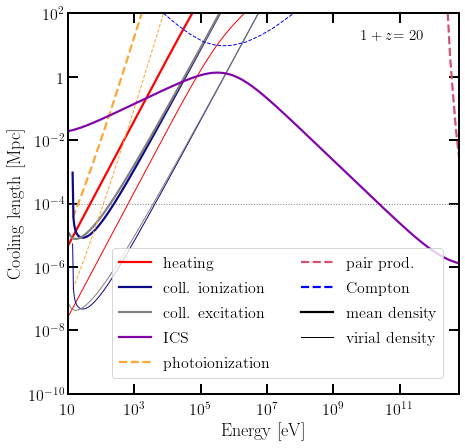

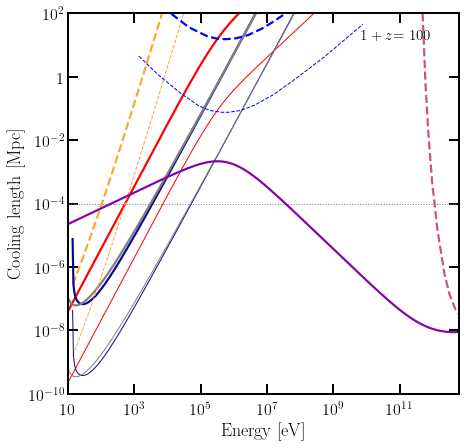

In [16]:
thick = 2.2
thin = 1

for ii, rs in enumerate(plot_rs):
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()

    # IGM density
    plt.plot(photeng, length_photo_ion[ii] / cm_per_kpc / 1000, 
        linewidth=thick, color=cmap[3], label='photoionization', linestyle='--')
    plt.plot(eleceng, eleceng / dE_heat_dt[ii] * phys.c * beta_list / cm_per_kpc / 1000, 
        linewidth=thick, color='r', label='heating')
    plt.plot(eleceng, length_coll_ion[ii] / cm_per_kpc / 1000 * (eleceng / phys.rydberg), 
        linewidth=thick, color=cmap[0], label='coll. ionization')
    plt.plot(eleceng, length_coll_exc[ii] / cm_per_kpc / 1000 * (eleceng / phys.lya_eng), 
        linewidth=thick, color='grey', label='coll. excitation')
    
    # virial density
    plt.plot(photeng, length_photo_ion[ii] / cm_per_kpc / 1000 / (18*np.pi**2), 
        linewidth=thin, color=cmap[3], linestyle='--')
    plt.plot(eleceng, eleceng / dE_heat_dt[ii] * phys.c * beta_list / cm_per_kpc / 1000 / (18*np.pi**2), 
        linewidth=thin, color='r')
    plt.plot(eleceng, length_coll_ion[ii] / cm_per_kpc / 1000 * (eleceng / phys.rydberg) / (18*np.pi**2), 
        linewidth=thin, color=cmap[0])
    plt.plot(eleceng, length_coll_exc[ii] / cm_per_kpc / 1000 * (eleceng / phys.lya_eng) / (18*np.pi**2), 
        linewidth=thin, color='grey')

    # Does not depend on gas density
    plt.plot(eleceng, eleceng / dE_ICS_dt[ii] * phys.c * beta_list / cm_per_kpc / 1000, 
        linewidth=thick, color=cmap[1], label='ICS')
    
    # Digitized plots
    if rs==100:
        plt.plot(length_pp_rs100[:,0], length_pp_rs100[:,1],
                 linewidth=thick, color=cmap[2], label='pair prod.', linestyle='--')
        plt.plot(length_cs_rs100_IGM[:,0], length_cs_rs100_IGM[:,1],
                 linewidth=thick, color='blue', label='Compton', linestyle='--')
        plt.plot(length_cs_rs100_halo[:,0], length_cs_rs100_halo[:,1],
                 linewidth=thin, color='blue', linestyle='--')
    else:
        plt.plot(length_pp_rs20[:,0], length_pp_rs20[:,1],
                 linewidth=thick, color=cmap[2], label='pair prod.', linestyle='--')
        plt.plot(length_cs_rs100_IGM[:,0], 1e10*length_cs_rs100_IGM[:,1],
                 linewidth=thick, color='blue', label='Compton', linestyle='--')
        plt.plot(length_cs_rs20_halo[:,0], length_cs_rs20_halo[:,1],
                 linewidth=thin, color='blue', linestyle='--')

    plt.hlines(1e-4, 10, 1e13, linewidth=1, color='gray', linestyle=':')
    plt.plot(1e-20, color='k', linewidth=thick, label='mean density')
    plt.plot(1e-20, color='k', linewidth=thin, label='virial density')
    # plt.plot(1e-20, color='k', linewidth=thick, linestyle='--', label='photon cooling')

    plt.xlim(10,6e12)
    plt.ylim(1e-10, 1e2)

    plt.xlabel("Energy [eV]")
    plt.ylabel("Cooling length [Mpc]")
    plt.text(0.75, 0.93, r"$1+z$"+f"= {rs:.0f}", fontsize=15, transform = ax.transAxes)
    if ii == 0:
        handles, labels = plt.gca().get_legend_handles_labels()
        order = [1,2,3,4,0,5,6,7,8]
        plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best', ncol=2) 

    plt.savefig(fig_dir+f'cooling_length_1+z={rs:.0f}.pdf')
    plt.show()